In [1]:
import tensorflow as tf

In [349]:
train_dir = 'dataset/Dataset/train'
val_dir = 'dataset/Dataset/val'

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                shuffle=True,
                                                                label_mode='categorical',
                                                                image_size=(336, 336))

validation_data = tf.keras.preprocessing.image_dataset_from_directory(val_dir,
                                                                      label_mode='categorical',
                                                                      image_size=(336, 336))

Found 3996 files belonging to 20 classes.
Found 1250 files belonging to 20 classes.


In [350]:
## Getting Class names
import pathlib
import os
path = pathlib.Path(train_dir)
class_names = sorted(os.listdir(path))
len(class_names), class_names[:6]

(20,
 ['burger', 'butter_naan', 'chai', 'chapati', 'chole_bhature', 'dal_makhani'])

In [351]:
train_sample_image = train_data.take(1)
vali_sample_image = validation_data.take(1)

<dtype: 'float32'>


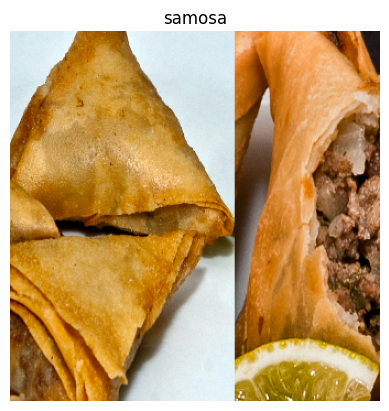

In [352]:
# def rand_plot(file):
import matplotlib.pyplot as plt
import random
for image, label in vali_sample_image:
    rand_index = random.randint(0, 32)
    image = image[rand_index]/255.
    label = tf.argmax(label[rand_index]).numpy()
    print(image.dtype)
    plt.imshow(image)
    plt.title(class_names[label])
    plt.axis(False)

In [353]:
import tensorflow.keras.layers as layers
data_augmentation = tf.keras.models.Sequential([
    layers.RandomFlip('verticle'),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
])

In [354]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(336, 336, 3), name='input_layer')

x = data_augmentation(inputs)

x = base_model(x, training=False)

x = tf.keras.layers.GlobalAveragePooling2D(name='globa_average_pooing')(x)

output = tf.keras.layers.Dense(len(class_names), activation='softmax', name='output_layer')(x)

model = tf.keras.Model(inputs, output)

## Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [355]:
model.summary()

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 336, 336, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, None, None, 1280)    │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ globa_average_pooing                 │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 20)                  │          25,620 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,075,191 (15.55 MB)

 Trainable params: 25,620 (100.08 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [356]:
history = model.fit(train_data,
                    epochs=5,
                    validation_data=validation_data,
                    validation_steps=int(0.15 * len(validation_data)))

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.4882 - loss: 2.0805 - val_accuracy: 0.9115 - val_loss: 0.6231
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.8712 - loss: 0.6800 - val_accuracy: 0.8802 - val_loss: 0.4872
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.9046 - loss: 0.4536 - val_accuracy: 0.9167 - val_loss: 0.3763
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.9233 - loss: 0.3491 - val_accuracy: 0.9062 - val_loss: 0.3812
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.9362 - loss: 0.2941 - val_accuracy: 0.9375 - val_loss: 0.2669


In [357]:
eval_model = model.evaluate(validation_data)
eval_model

40/40 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.9271 - loss: 0.3072


[0.2961377799510956, 0.930400013923645]

<Axes: >

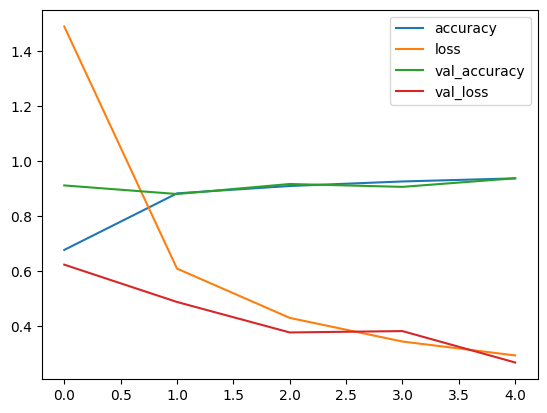

In [358]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [359]:
test_dir = 'test'
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=(336, 336),
                                                                label_mode='categorical')

Found 585 files belonging to 20 classes.


In [360]:
585/20

29.25

In [361]:
import matplotlib.image as mimg
def pred_plot(directory):
    filename = os.listdir(directory)
    rand_file = random.choice(filename)
    rand_index = random.randint(0, 25) 
    file_path = os.path.join(directory, rand_file)
    image_file = os.listdir(file_path)[rand_index]
    rand_image_path = os.path.join(file_path, image_file)
    image = mimg.imread(rand_image_path)
    plt.imshow(image)

    image = tf.image.resize(image, [336, 336])
    image = tf.expand_dims(image, axis=0)
    
    pred = model.predict(image).argmax()
    if class_names[pred] == rand_file:
        color='g'
    else:
        color='r'
    plt.title(f"Predicted: {class_names[pred]}, Actual: {rand_file}", color=color)
    plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


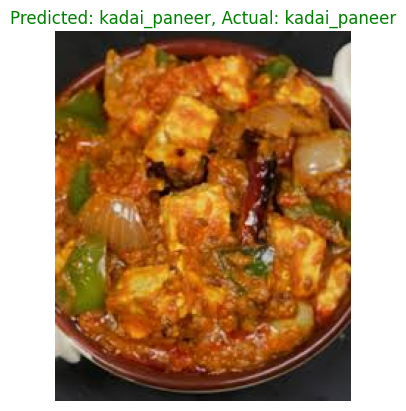

In [373]:
pred_plot('test')